<a href="https://www.kaggle.com/code/shubhamgupta012/books-dataset-analysis?scriptVersionId=135687961" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/book-dataset-300k-scraped-polish/book_data.csv


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/kaggle/input/book-dataset-300k-scraped-polish/book_data.csv',low_memory=False)
df.head()

,Title,OriginalTitle,Publisher,Author,Translator,Score,AmountOfScores,AmountOfComments,Part,Read,Own,Favorite,WantToRead,Category,Pages,Tags,PublishDate,FirstPublishDate,FirstPolishPublishDate,Language,ISBN
0,0.4,NaN,Egmont UK,Mike Lancaster,NaN,6.3,3.0,1.0,NaN,3.0,NaN,NaN,9.0,"fantasy, science fiction",304.0,"dystopia,technologia,cyberpunk,przyszłość,anty...",2011-01-03,2011-01-03,NaN,angielski,9781405253048
1,13,NaN,Kolektyw Trzynasty Schron,"Adam Bełda,Bartosz Boroński,Marek Dryjer,Patry...",NaN,8.0,2.0,1.0,NaN,3.0,2.0,NaN,40.0,"fantasy, science fiction",675.0,"postapokalipsa,fantastyka,literatura polska,an...",2012-05-13,NaN,2012-05-13,polski,9788377221815
2,14,NaN,Permuted Press,Peter Clines,NaN,6.7,9.0,1.0,1,11.0,NaN,NaN,11.0,horror,370.0,"Lovecraft,Cthulu,new weird,Los Angeles,horror,...",2012-05-07,2012-05-07,NaN,angielski,9781618680525
3,15,NaN,Góry,"Krzysztof Belczyński,Maciej Ciesielski,David K...",NaN,6.8,16.0,2.0,NaN,19.0,13.0,NaN,78.0,powieść przygodowa,249.0,"góry,wspinaczka",2006-01-01,NaN,2006-01-01,polski,978-83-924395-3-0
4,27,Twenty seven,Amber,William Diehl,"Irena Dawid-Olczyk,Monika Kajszczak",7.2,6.0,2.0,NaN,9.0,4.0,NaN,13.0,"kryminał, sensacja, thriller",458.0,NaN,1990-01-01,NaN,1990-01-01,polski,8370822029


In [4]:
df.shape

(352066, 21)

In [5]:
df.describe()

,Score,AmountOfScores,AmountOfComments,Read,Own,Favorite,WantToRead,Pages
count,344696.000000,344696.000000,344696.000000,344113.000000,238049.000000,83202.000000,279569.000000,308161.000000
mean,6.889235,82.704824,10.053038,115.308605,37.345597,20.569926,86.946303,247.566532
std,1.320952,713.554202,57.236651,1079.226084,279.238184,167.518892,385.520702,169.515260
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,1.000000,0.000000,2.000000,2.000000,1.000000,3.000000,133.000000
50%,7.000000,4.000000,1.000000,6.000000,5.000000,3.000000,11.000000,224.000000
75%,7.700000,22.000000,3.000000,30.000000,17.000000,8.000000,43.000000,335.000000
max,10.000000,80214.000000,4791.000000,117540.000000,29286.000000,11249.000000,23423.000000,5901.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352066 entries, 0 to 352065
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Title                   352066 non-null  object 
 1   OriginalTitle           135655 non-null  object 
 2   Publisher               347104 non-null  object 
 3   Author                  351256 non-null  object 
 4   Translator              100433 non-null  object 
 5   Score                   344696 non-null  float64
 6   AmountOfScores          344696 non-null  float64
 7   AmountOfComments        344696 non-null  float64
 8   Part                    75434 non-null   object 
 9   Read                    344113 non-null  float64
 10  Own                     238049 non-null  float64
 11  Favorite                83202 non-null   float64
 12  WantToRead              279569 non-null  float64
 13  Category                352066 non-null  object 
 14  Pages               

In [7]:
df.dtypes

Title                      object
OriginalTitle              object
Publisher                  object
Author                     object
Translator                 object
Score                     float64
AmountOfScores            float64
AmountOfComments          float64
Part                       object
Read                      float64
Own                       float64
Favorite                  float64
WantToRead                float64
Category                   object
Pages                     float64
Tags                       object
PublishDate                object
FirstPublishDate           object
FirstPolishPublishDate     object
Language                   object
ISBN                       object
dtype: object

In [8]:
df.isnull().sum()

Title                          0
OriginalTitle             216411
Publisher                   4962
Author                       810
Translator                251633
Score                       7370
AmountOfScores              7370
AmountOfComments            7370
Part                      276632
Read                        7953
Own                       114017
Favorite                  268864
WantToRead                 72497
Category                       0
Pages                      43905
Tags                      146781
PublishDate                    0
FirstPublishDate          271632
FirstPolishPublishDate     66905
Language                       0
ISBN                           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Author'].value_counts()

praca zbiorowa                                     10522
Walt Disney                                          504
autor nieznany                                       488
Redakcja magazynu National Geographic                418
Małgorzata Strzałkowska                              319
                                                   ...  
Anne Maar                                              1
Hugh Johnson                                           1
David Hilliard, Keith Zimmerman, Kent Zimmerman        1
RJ Owen, Luke Stevens                                  1
Jan Jałoszyński                                        1
Name: Author, Length: 145276, dtype: int64

In [11]:
df['Language'].value_counts()

polski          284907
angielski        56271
japoński          4694
francuski         2026
niemiecki         1845
włoski             535
hiszpański         481
czeski             282
rosyjski           241
szwedzki           111
norweski           107
chiński             92
duński              83
portugalski         51
koreański           43
niderlandzki        40
słowacki            40
chorwacki           37
serbski             31
białoruski          30
łaciński            25
ukraiński           21
fiński              15
kaszubski           14
słoweński           12
węgierski           12
bośniacki            6
turecki              5
łotewski             3
bułgarski            3
rumuński             1
litewski             1
esperanto            1
Name: Language, dtype: int64

In [12]:
df['Category'].value_counts()

komiksy                                                34451
literatura piękna                                      32671
literatura obyczajowa, romans                          29184
fantasy, science fiction                               23895
literatura dziecięca                                   21208
historia                                               19545
kryminał, sensacja, thriller                           16849
biografia, autobiografia, pamiętnik                    16289
nauki społeczne (psychologia, socjologia, itd.)        12893
poradniki                                              11905
religia                                                11515
powieść historyczna                                     9259
czasopisma                                              9079
reportaż                                                7432
popularnonaukowa                                        6372
literatura młodzieżowa                                  6005
filozofia, etyka        

In [13]:
df['Publisher'].value_counts()

Egmont Polska                 6302
Harlequin                     4924
Prószyński i S-ka             4787
Wydawnictwo Naukowe PWN       4512
Amber                         4304
                              ... 
Dom Dobry                        1
Maulde & Renou                   1
Drukarnia Polska we Lwowie       1
Dzirawe Sample                   1
Jan Jałoszyński                  1
Name: Publisher, Length: 22843, dtype: int64

In [14]:
df['Part'].value_counts()

1        16444
2        13038
3         9070
4         5370
5         3690
         ...  
60-72        1
631          1
113.5        1
627          1
593          1
Name: Part, Length: 1153, dtype: int64

In [15]:
# df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df['PublishDate'] = pd.to_datetime(df['PublishDate'], errors = 'coerce')

In [16]:
df.head()

,Title,OriginalTitle,Publisher,Author,Translator,Score,AmountOfScores,AmountOfComments,Part,Read,Own,Favorite,WantToRead,Category,Pages,Tags,PublishDate,FirstPublishDate,FirstPolishPublishDate,Language,ISBN
0,0.4,NaN,Egmont UK,Mike Lancaster,NaN,6.3,3.0,1.0,NaN,3.0,NaN,NaN,9.0,"fantasy, science fiction",304.0,"dystopia,technologia,cyberpunk,przyszłość,anty...",2011-01-03,2011-01-03,NaN,angielski,9781405253048
1,13,NaN,Kolektyw Trzynasty Schron,"Adam Bełda,Bartosz Boroński,Marek Dryjer,Patry...",NaN,8.0,2.0,1.0,NaN,3.0,2.0,NaN,40.0,"fantasy, science fiction",675.0,"postapokalipsa,fantastyka,literatura polska,an...",2012-05-13,NaN,2012-05-13,polski,9788377221815
2,14,NaN,Permuted Press,Peter Clines,NaN,6.7,9.0,1.0,1,11.0,NaN,NaN,11.0,horror,370.0,"Lovecraft,Cthulu,new weird,Los Angeles,horror,...",2012-05-07,2012-05-07,NaN,angielski,9781618680525
3,15,NaN,Góry,"Krzysztof Belczyński,Maciej Ciesielski,David K...",NaN,6.8,16.0,2.0,NaN,19.0,13.0,NaN,78.0,powieść przygodowa,249.0,"góry,wspinaczka",2006-01-01,NaN,2006-01-01,polski,978-83-924395-3-0
4,27,Twenty seven,Amber,William Diehl,"Irena Dawid-Olczyk,Monika Kajszczak",7.2,6.0,2.0,NaN,9.0,4.0,NaN,13.0,"kryminał, sensacja, thriller",458.0,NaN,1990-01-01,NaN,1990-01-01,polski,8370822029


In [17]:
df['Year'] = df['PublishDate'].dt.year

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

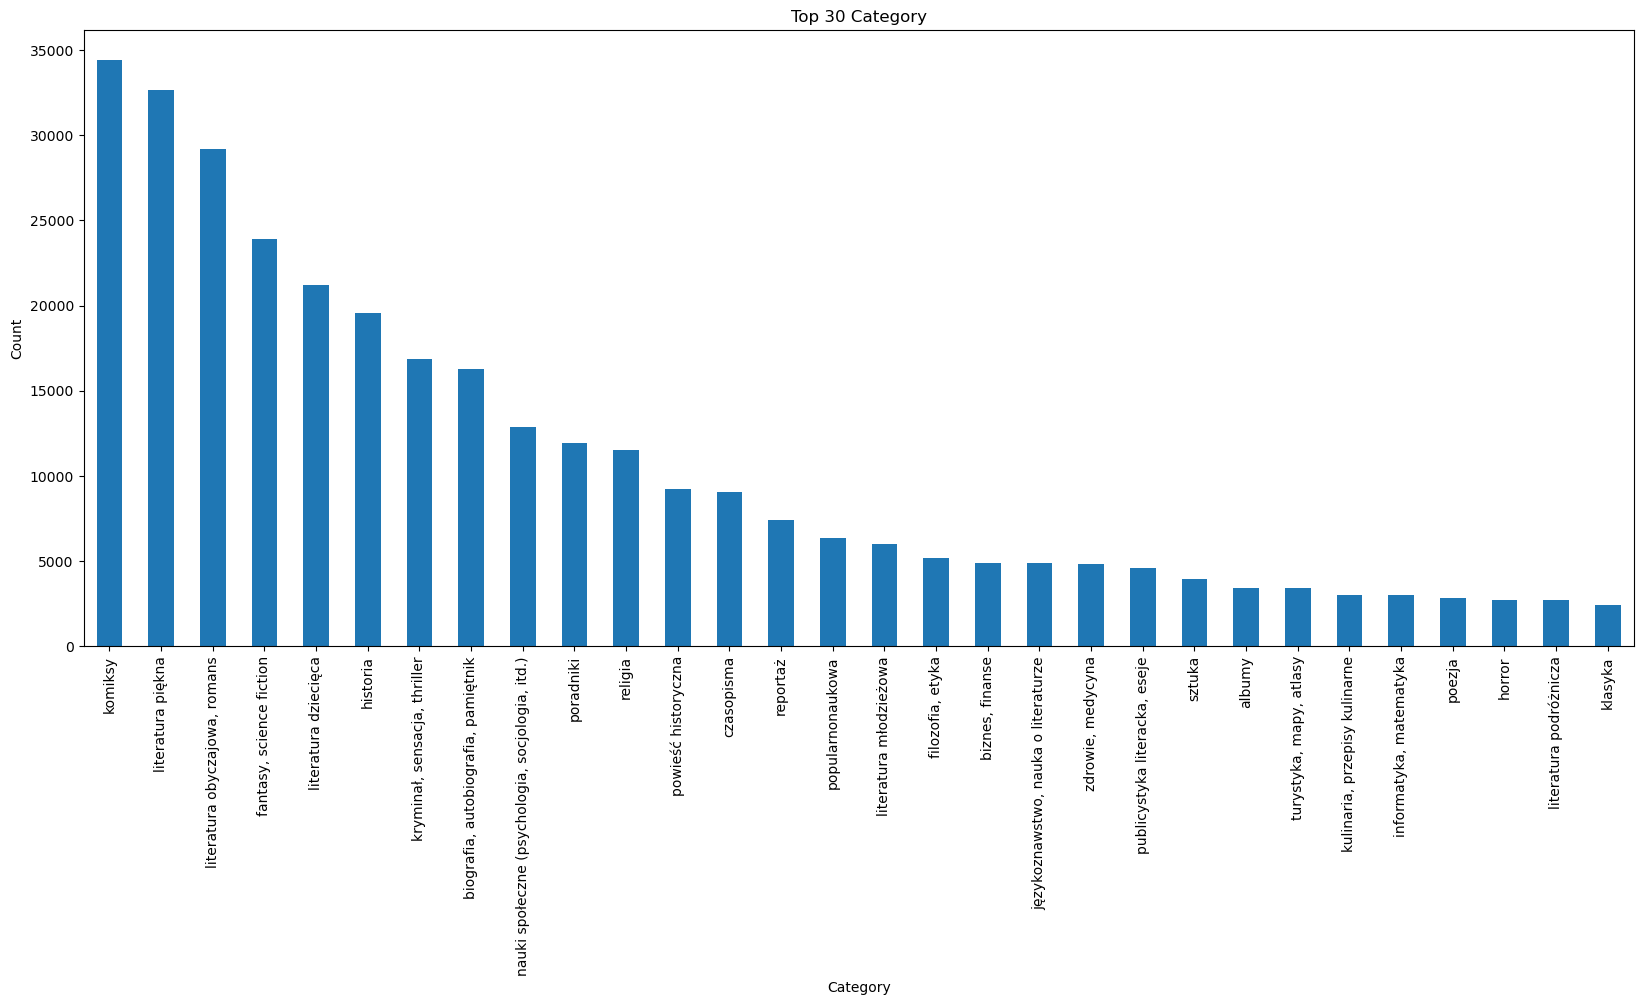

In [19]:
location_counts = df['Category'].value_counts().head(30)

# Plotting the bar graph
plt.figure(figsize=(20,8))
location_counts.plot(kind='bar')
plt.title('Top 30 Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

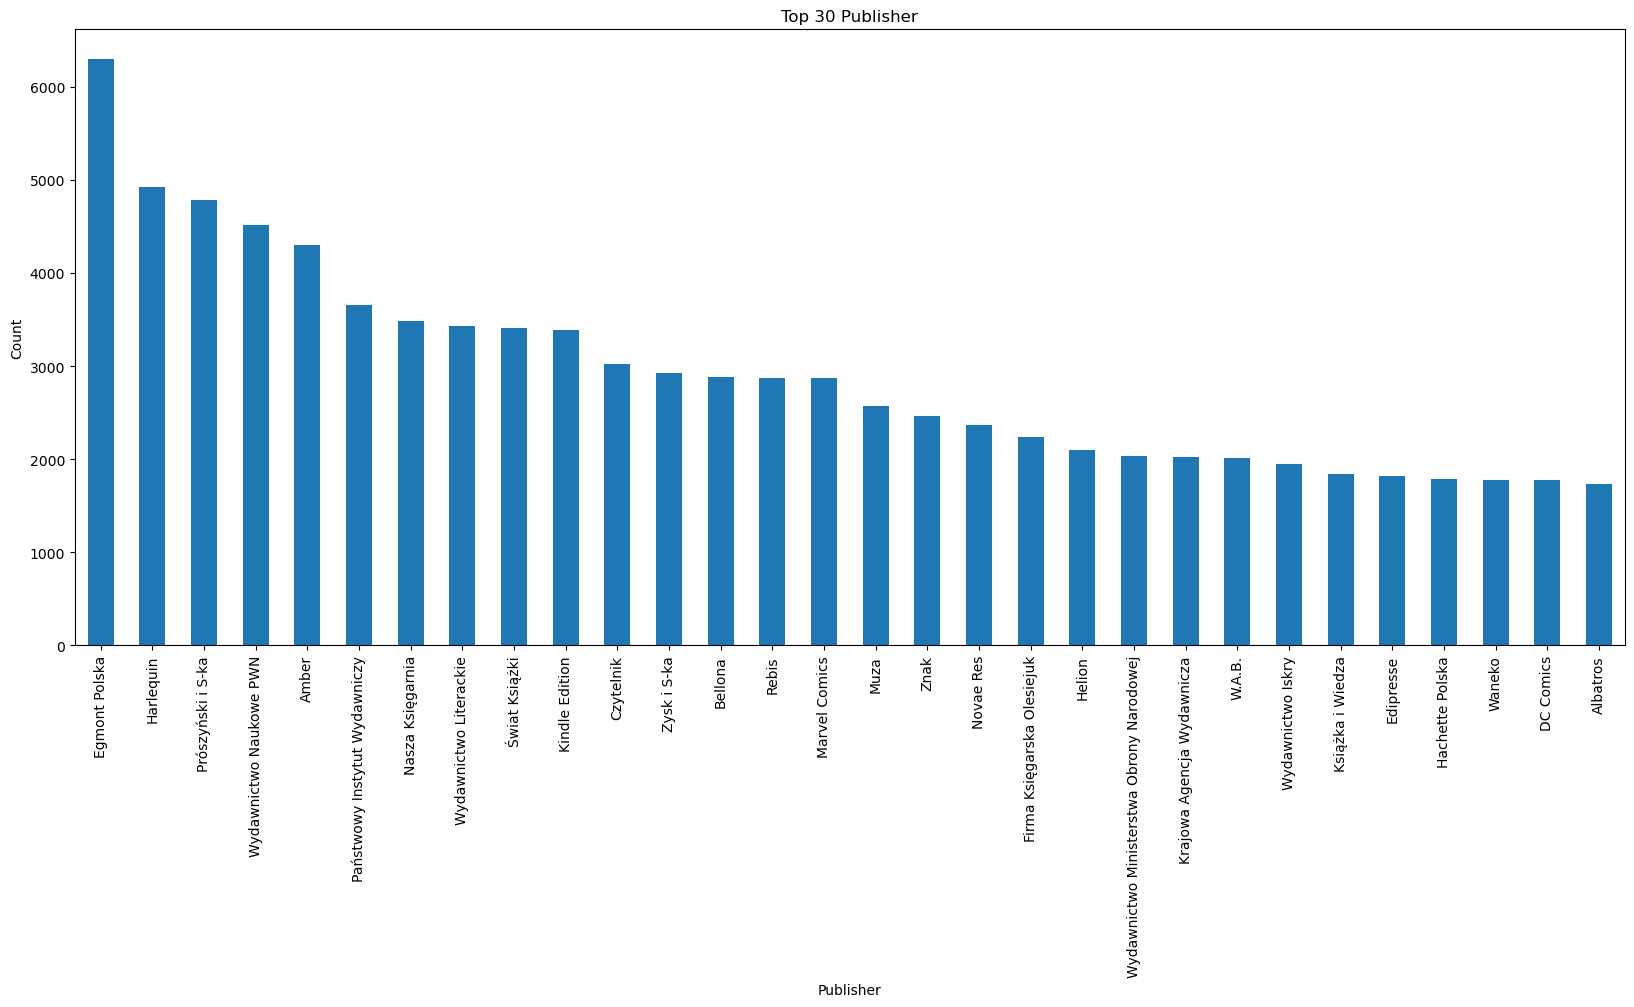

In [20]:
location_counts = df['Publisher'].value_counts().head(30)

# Plotting the bar graph
plt.figure(figsize=(20,8))
location_counts.plot(kind='bar')
plt.title('Top 30 Publisher')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

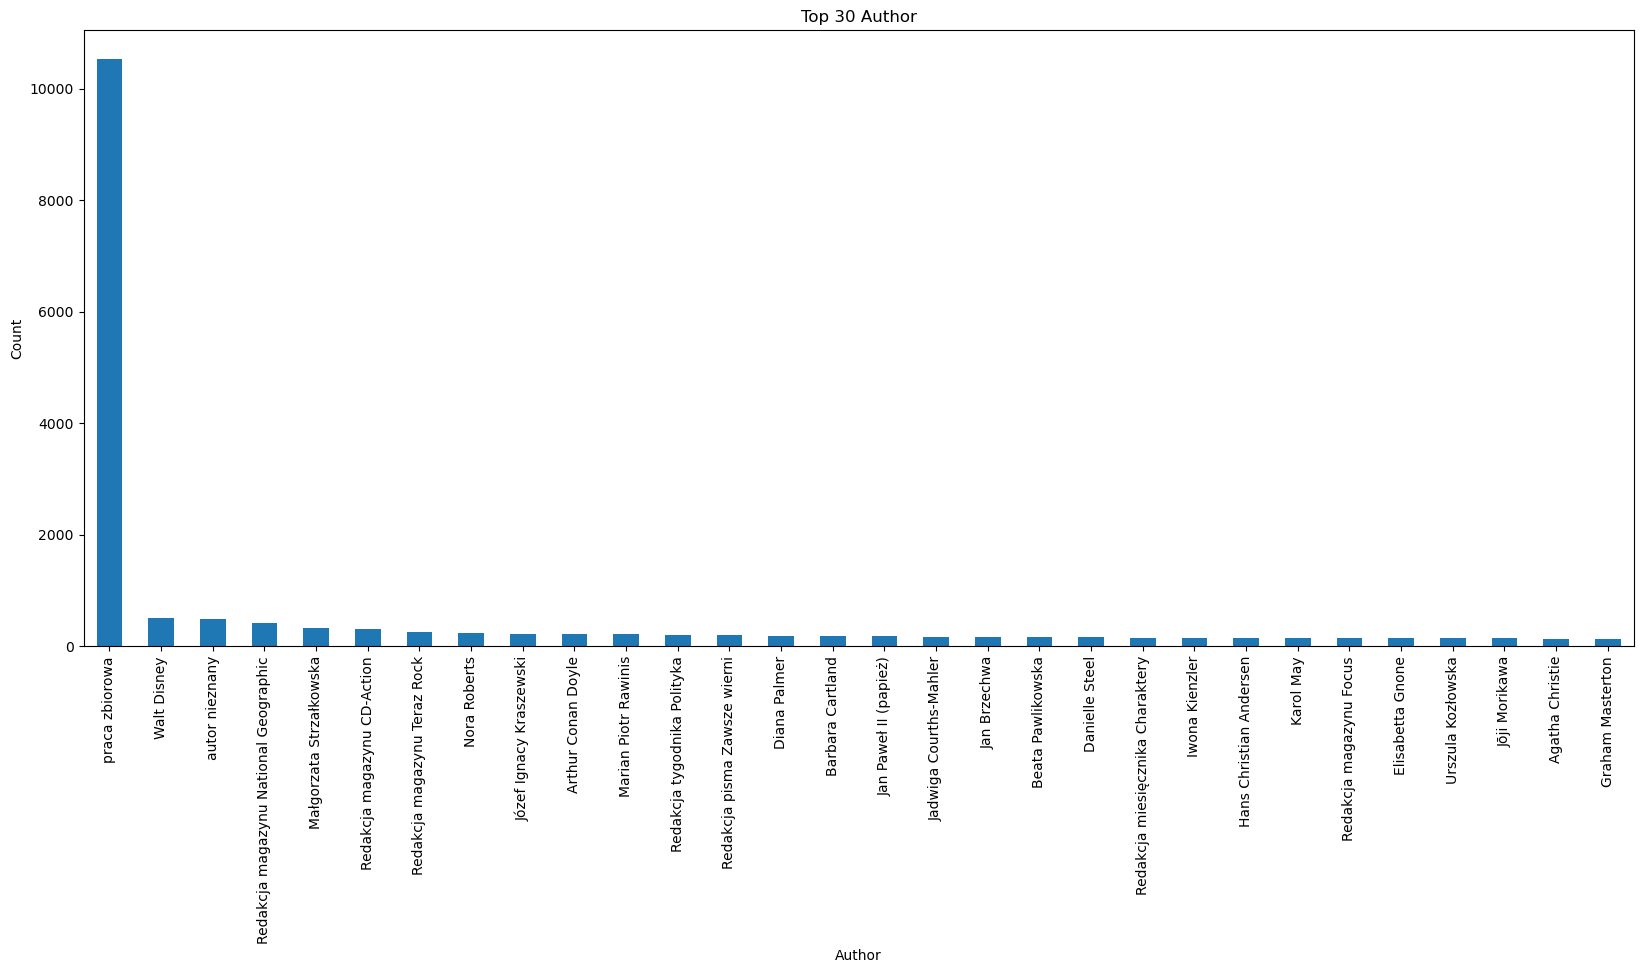

In [21]:
location_counts = df['Author'].value_counts().head(30)

# Plotting the bar graph
plt.figure(figsize=(20,8))
location_counts.plot(kind='bar')
plt.title('Top 30 Author')
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

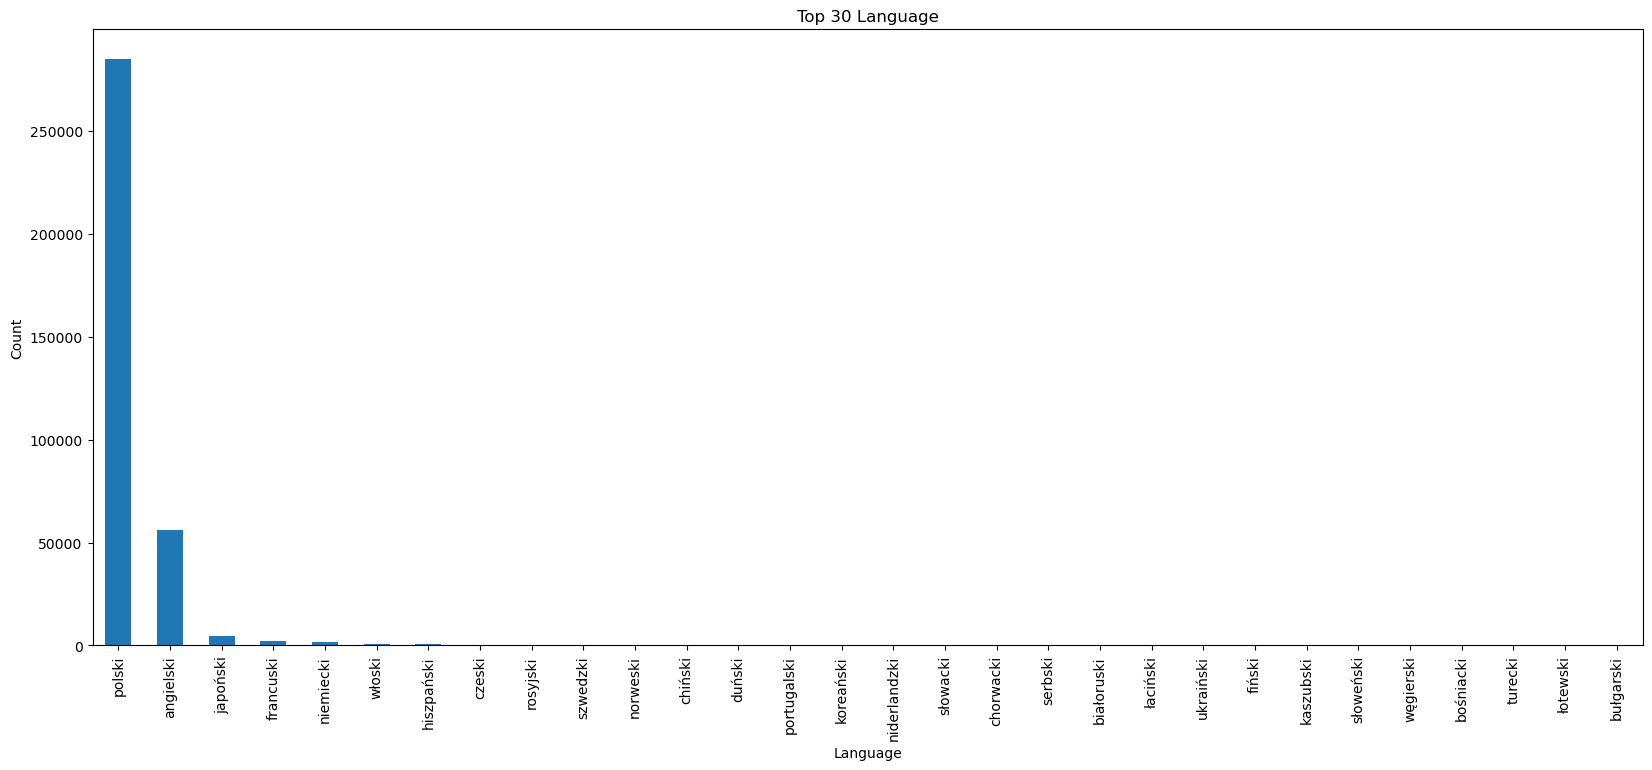

In [22]:
location_counts = df['Language'].value_counts().head(30)

# Plotting the bar graph
plt.figure(figsize=(20,8))
location_counts.plot(kind='bar')
plt.title('Top 30 Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()